# What is Feature Scaling

#### Step-1 What is Feature Scaling.
#### Step-2 Feature Scaling ( Standardization ).
#### Step-3 Feature Scaling ( Normalization ).
#### Step-4  Handle Duplicate Data .
#### Step-5  Replace and Change Data Types.

# Step-1 What is Feature Scaling

Feature scaling is a preprocessing technique that transforms feature values to a similar scale, ensuring all features contribute equally to the model. It’s essential for datasets with features of varying ranges, units, or magnitudes
There are Two types:-
1. Standardization
2. Normalization

# Step-2  Feature Scaling ( Standardization )

Xnew = ( Xi - Xmean) / Standard Deviation

         

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv(r"C:\Users\jites\OneDrive\Desktop\archive\loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

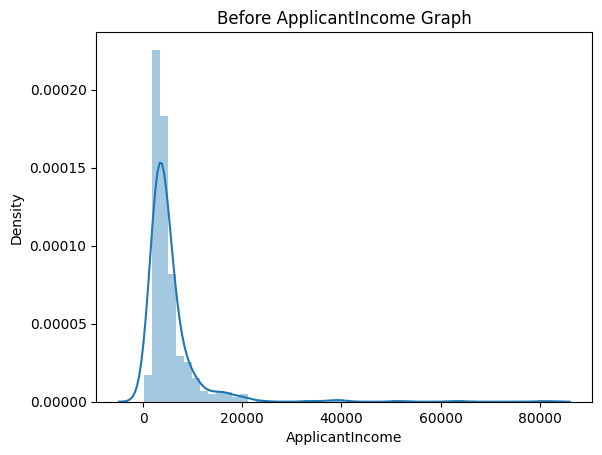

In [5]:
sns.distplot(dataset["ApplicantIncome"])        # by this show the range of dataset with Graph's.
plt.title("Before ApplicantIncome Graph")
plt.show()

In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
from sklearn.preprocessing import StandardScaler     # for Feature Scaling ( Standardization ) we use sklearn library

In [8]:
ss = StandardScaler()
ss.fit(dataset[["ApplicantIncome"]])

StandardScaler()

In [62]:
ss.transform(dataset[["ApplicantIncome"]])

array([[ 7.29908229e-02],
       [-1.34411954e-01],
       [-3.93747337e-01],
       [-4.62062470e-01],
       [ 9.77284368e-02],
       [ 2.21831139e-03],
       [-5.03018784e-01],
       [-3.87849628e-01],
       [-2.28939128e-01],
       [ 1.21845703e+00],
       [-3.60982286e-01],
       [-4.75659966e-01],
       [-3.81788093e-01],
       [-5.81654908e-01],
       [-6.72414101e-01],
       [-7.42880841e-02],
       [-2.96107483e-01],
       [-3.10196456e-01],
       [-8.46090753e-02],
       [-4.59277440e-01],
       [ 3.69678365e-01],
       [ 9.03563002e-02],
       [-4.59277440e-01],
       [-3.33951118e-01],
       [-2.76284627e-01],
       [ 6.80946355e-01],
       [-4.26676214e-01],
       [-1.92897571e-01],
       [-6.48987089e-01],
       [-2.70878394e-01],
       [-2.02727086e-01],
       [-3.66388519e-01],
       [-1.16555001e-01],
       [-3.11834708e-01],
       [ 1.16259261e+00],
       [-5.12520649e-01],
       [-5.85750540e-01],
       [-2.84475890e-01],
       [-2.0

In [10]:
dataset["ApplicantIncome_ss"] = ss.transform(dataset[["ApplicantIncome"]]) # add new data is our dataset for comparsion...

In [11]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [12]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


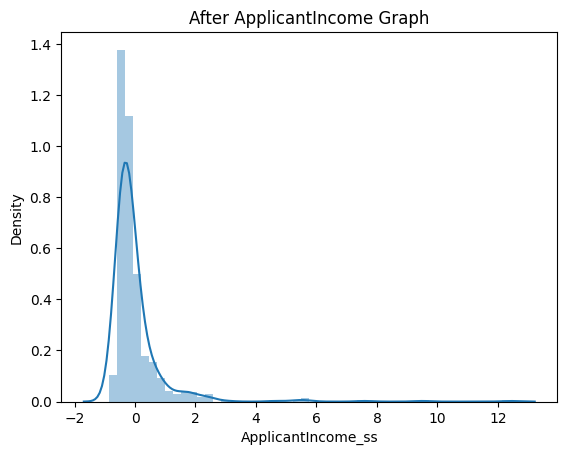

In [32]:
sns.distplot(dataset["ApplicantIncome_ss"])
plt.title("After ApplicantIncome Graph")
plt.show()

# Step-3 Feature Scaling ( Normalization )

In [33]:
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,CoapplicantIncome_mms
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192


In [34]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss,CoapplicantIncome_mms
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18,0.038910
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00,0.070229
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01,0.028524
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02,0.055134
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01,1.000000


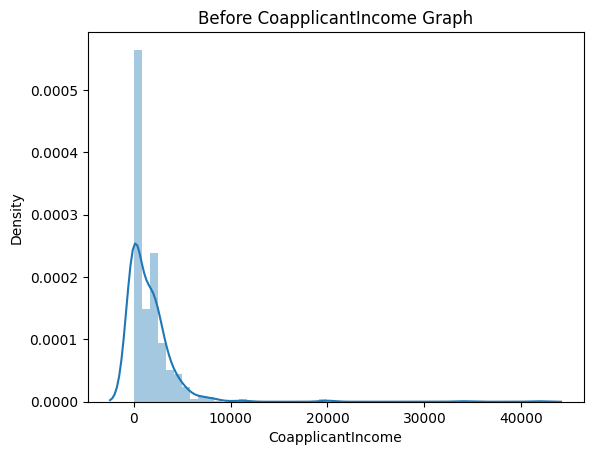

In [35]:
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before CoapplicantIncome Graph")
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mms = MinMaxScaler()
mms.fit(dataset[["CoapplicantIncome"]])

MinMaxScaler()

In [38]:
dataset["CoapplicantIncome_mms"]=mms.transform(dataset[["CoapplicantIncome"]])

In [39]:
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,CoapplicantIncome_mms
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192


In [40]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss,CoapplicantIncome_mms
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18,0.038910
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00,0.070229
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01,0.028524
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02,0.055134
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01,1.000000


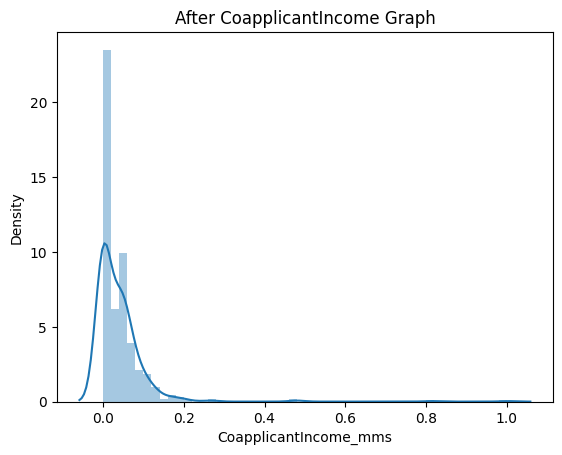

In [41]:
sns.distplot(dataset["CoapplicantIncome_mms"])
plt.title("After CoapplicantIncome Graph")
plt.show()

# Step-4  Handle Duplicate Data .

In [42]:
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,CoapplicantIncome_mms
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192


In [43]:
dataset.shape             # Shape of data before drop dataset

(614, 15)

In [44]:
dataset.drop_duplicates(inplace=True)  # Present Remaining duplicate data can drop autumatically 

In [45]:
dataset.shape           # Shape of data after drop dataset

(614, 15)

# Step-5  Replace and Change Data Types.

In [46]:
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,CoapplicantIncome_mms
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192


### first of all fill all null values

In [47]:
dataset.isnull().sum()

Loan_ID                   0
Gender                   13
Married                   3
Dependents               15
Education                 0
Self_Employed            32
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               22
Loan_Amount_Term         14
Credit_History           50
Property_Area             0
Loan_Status               0
ApplicantIncome_ss        0
CoapplicantIncome_mms     0
dtype: int64

In [48]:
for i in dataset.select_dtypes(include="object").columns:        # By this line of code Only "Object type" data are affect
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)

In [49]:
for i in dataset.select_dtypes(include="float64").columns:      # By this line of code Only "float64 type" data are affect
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)

In [50]:
dataset.isnull().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
ApplicantIncome_ss       0
CoapplicantIncome_mms    0
dtype: int64

### convert format of values

In [51]:
dataset["Dependents"].value_counts()    # we can change data of of Dependents variable

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [61]:
dataset["Dependents"].replace("3+","3",inplace=True)            # 3+ in 3

In [54]:
dataset["Dependents"].value_counts()  # After use replace method we can change "3+" in "3"

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

### convert the Type of "Dependents" (object to int64)  

In [56]:
dataset.info()                                          # Before conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 614 non-null    object 
 2   Married                614 non-null    object 
 3   Dependents             614 non-null    object 
 4   Education              614 non-null    object 
 5   Self_Employed          614 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             614 non-null    float64
 9   Loan_Amount_Term       614 non-null    float64
 10  Credit_History         614 non-null    float64
 11  Property_Area          614 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  ApplicantIncome_ss     614 non-null    float64
 14  CoapplicantIncome_mms  614 non-null    float64
dtypes: flo

In [58]:
dataset["Dependents"] =dataset["Dependents"].astype("int64")

In [60]:
dataset.info()                                              # After conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 614 non-null    object 
 2   Married                614 non-null    object 
 3   Dependents             614 non-null    int64  
 4   Education              614 non-null    object 
 5   Self_Employed          614 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             614 non-null    float64
 9   Loan_Amount_Term       614 non-null    float64
 10  Credit_History         614 non-null    float64
 11  Property_Area          614 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  ApplicantIncome_ss     614 non-null    float64
 14  CoapplicantIncome_mms  614 non-null    float64
dtypes: flo